# Лабораторная работа №5.1.3
## Эффект Рамзауэра

In [71]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import interpolate
%matplotlib inline

In [72]:
h = 6.626e-34
m = 9.1e-31
e = 1.6e-19

## Динамический режим

In [104]:
d = np.array([ [2.509, 5*5, 5*6.3, 5*7.5],
               [2.626, 5*5, 5*6.4, 5*7.2],
               [2.743, 5*4.8, 5*6.3, 5*7.1],
               [2.885, 5*5.2, 5*6.4, 5*7.4]])
data = pd.DataFrame(data=d, columns=['Vнак, B', 'Emin, эВ', 'Emax, эВ', 'Eпробой, эВ'],
                    index=(range(1,5)), dtype='float32')
display(data)

,"Vнак, B","Emin, эВ","Emax, эВ","Eпробой, эВ"
1,2.509,25.0,31.5,37.5
2,2.626,25.0,32.0,36.0
3,2.743,24.0,31.5,35.5
4,2.885,26.0,32.0,37.0


In [107]:
l = np.array([])
l.resize(4)
U0 = np.array([])
U0.resize(4)
for i in range(0, 4):
    l[i] = (h * np.sqrt(5)) / np.sqrt(32 * m * (d[i, 2] - d[i, 1]) * e)
    U0[i] = np.abs(4/5*d[i, 2] -9/5*d[i, 1])
data['l, 10**-10м'] = l
data['U0, эВ'] = U0
display(data)

,"Vнак, B","Emin, эВ","Emax, эВ","Eпробой, эВ","l, 10**-10м","U0, эВ"
1,2.509,25.0,31.5,37.5,2.692304e-10,25.0
2,2.626,25.0,32.0,36.0,2.594369e-10,25.0
3,2.743,24.0,31.5,35.5,2.506399e-10,24.0
4,2.885,26.0,32.0,37.0,2.802239e-10,26.0


## Статический режим

In [108]:
R = 100*10**3
V1 = 2.601
V2 = 2.826
Va = dict()
Vkc = dict()
Ia = dict()
Vkc[V1] = np.array([2.395, 2.530, 2.688, 2.804, 2.946, 3.175, 3.533, 3.772, 3.891, 4.107, 5.063, 5.503, 6.361, 7.533, 8.858, 10.076, 11.236, 11.729, 12.168])
Va[V1] = np.array([0.23, 0.61, 2.65, 5.53, 10.47, 18.29, 24.64, 26.63, 27.29, 27.95, 27.17, 25.63, 22.56, 17.97, 13.53, 11.99, 12.64, 13.12, 13.75]) * 10**(-3)
Ia[V1] = Va[V1] / R
Vkc[V2] = np.array([2.321, 2.651, 2.813, 2.883, 2.985, 3.169, 3.443, 3.730, 4.336, 4.564, 4.652, 5.045, 5.722, 6.208, 7.982, 9.789, 10.541, 10.830, 11.258, 11.657])
Va[V2] = np.array([0.14, 4.71, 11.78, 15.98, 22.32, 33.95, 46.41, 54.05, 62.45, 63.88, 64.30, 64.66, 62.30, 58.65, 43.38, 33.25, 32.95, 33.55, 34.64, 36.18]) * 10**(-3)
Ia[V2] = Va[V2] / R

In [112]:
data = dict()
data[V1] = pd.DataFrame(data=np.array([Vkc[V1], Va[V1]*1e+3, Ia[V1]*1e+9]), index=['Vкс, В', 'Va, мВ', 'Ia, нА'])
data[V2] = pd.DataFrame(data=np.array([Vkc[V2], Va[V2]*1e+3, Ia[V2]*1e+9]), index=['Vкс, В', 'Va, мВ', 'Ia, нА'])
print('Напряжение накала {}В'.format(V1))
display(data[V1])
print('Напряжение накала {}В'.format(V2))
display(data[V2])

Напряжение накала 2.601В


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
"Vкс, В",2.395,2.53,2.688,2.804,2.946,3.175,3.533,3.772,3.891,4.107,5.063,5.503,6.361,7.533,8.858,10.076,11.236,11.729,12.168
"Va, мВ",0.230,0.61,2.650,5.530,10.470,18.290,24.640,26.630,27.290,27.950,27.170,25.630,22.560,17.970,13.530,11.990,12.640,13.120,13.750
"Ia, нА",2.300,6.10,26.500,55.300,104.700,182.900,246.400,266.300,272.900,279.500,271.700,256.300,225.600,179.700,135.300,119.900,126.400,131.200,137.500


Напряжение накала 2.826В


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
"Vкс, В",2.321,2.651,2.813,2.883,2.985,3.169,3.443,3.73,4.336,4.564,4.652,5.045,5.722,6.208,7.982,9.789,10.541,10.83,11.258,11.657
"Va, мВ",0.140,4.710,11.780,15.980,22.320,33.950,46.410,54.05,62.450,63.880,64.300,64.660,62.300,58.650,43.380,33.250,32.950,33.55,34.640,36.180
"Ia, нА",1.400,47.100,117.800,159.800,223.200,339.500,464.100,540.50,624.500,638.800,643.000,646.600,623.000,586.500,433.800,332.500,329.500,335.50,346.400,361.800


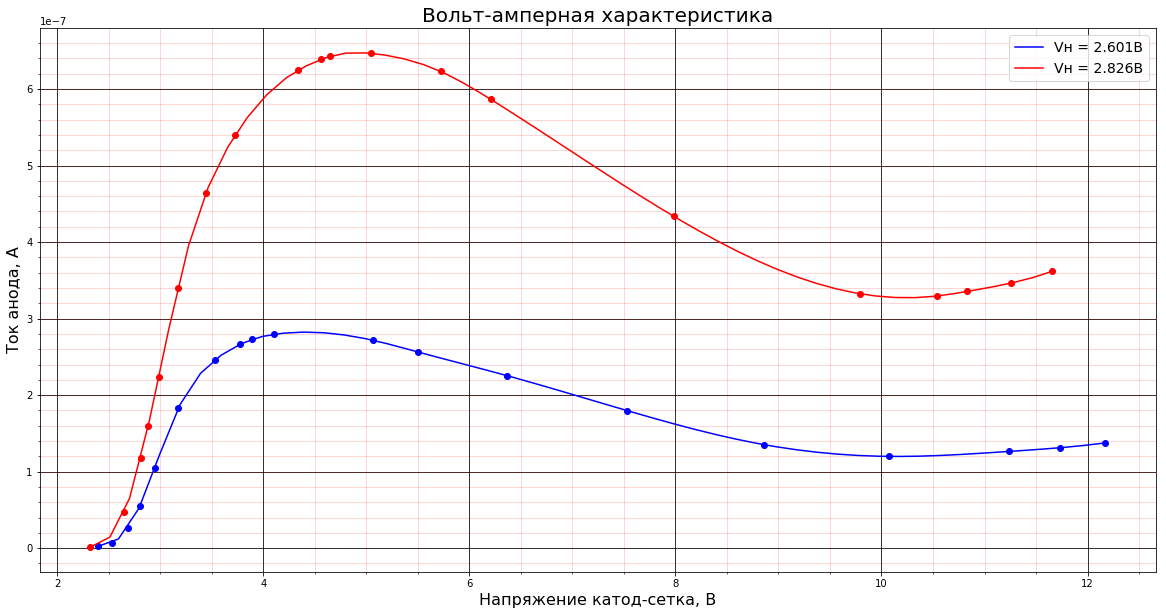

In [113]:
xx1 = np.linspace(np.min(Vkc[V1]), np.max(Vkc[V1]))
xx2 = np.linspace(np.min(Vkc[V2]), np.max(Vkc[V2]))
f1 = interpolate.interp1d(Vkc[V1], Ia[V1], kind='cubic')
f2 = interpolate.interp1d(Vkc[V2], Ia[V2], kind='cubic')

plt.figure(figsize=(20,10))
plt.plot(Vkc[V1], Ia[V1], 'bo') 
plt.plot(Vkc[V2], Ia[V2], 'ro') 
first, = plt.plot(xx1, f1(xx1), '-b',label=u'Vн = {}В'.format(V1))
second, = plt.plot(xx2, f2(xx2), '-r',label=u'Vн = {}В'.format(V2))
plt.legend(handles = [first, second], fontsize=14)
plt.title(u"Вольт-амперная характеристика", fontsize=20)
plt.xlabel(u"Напряжение катод-сетка, В", fontsize=16)
plt.ylabel(u"Ток анода, А", fontsize=16)
plt.grid(b=True, which='major', color='k', linestyle='-')
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
plt.minorticks_on()
plt.savefig('graph.png')
plt.show()

In [116]:
pts = np.linspace(4, 11)
yy1 = f1(pts)
max1 = pts[np.argmax(yy1)]
min1 = pts[np.argmin(yy1)]
yy2 = f2(pts)
max2 = pts[np.argmax(yy2)]
min2 = pts[np.argmin(yy2)]
d = np.array([[V1, max1, min1],
             [V2, max2, min2]])
data = pd.DataFrame(data=d, columns=['Vнак, B', 'Vmin, В', 'Vmax, В'])
display(data)

,"Vнак, B","Vmin, В","Vmax, В"
0,2.601,4.428571,10.142857
1,2.826,4.857143,10.285714


In [117]:
l = np.array([])
l.resize(2)
U0 = np.array([])
U0.resize(2)
for i in range(0,2):
    l[i] = (h * np.sqrt(5)) / np.sqrt(32 * m * (d[i, 2] - d[i, 1]) * e)
    U0[i] = np.abs(4/5*d[i, 2] -9/5*d[i, 1])
data['l, 10**-10м'] = l
data['U0, эВ'] = U0
display(data)

,"Vнак, B","Vmin, В","Vmax, В","l, 10**-10м","U0, эВ"
0,2.601,4.428571,10.142857,2.871440e-10,4.428571
1,2.826,4.857143,10.285714,2.946036e-10,4.857143


In [32]:
for n in (2, 3):
    print('E{} = '((np.pi * n / 2.14e-10)**2 * h**2/4/np.pi**2/2/m - 2.5*e )/ e)

30.4218283136
71.5741137056


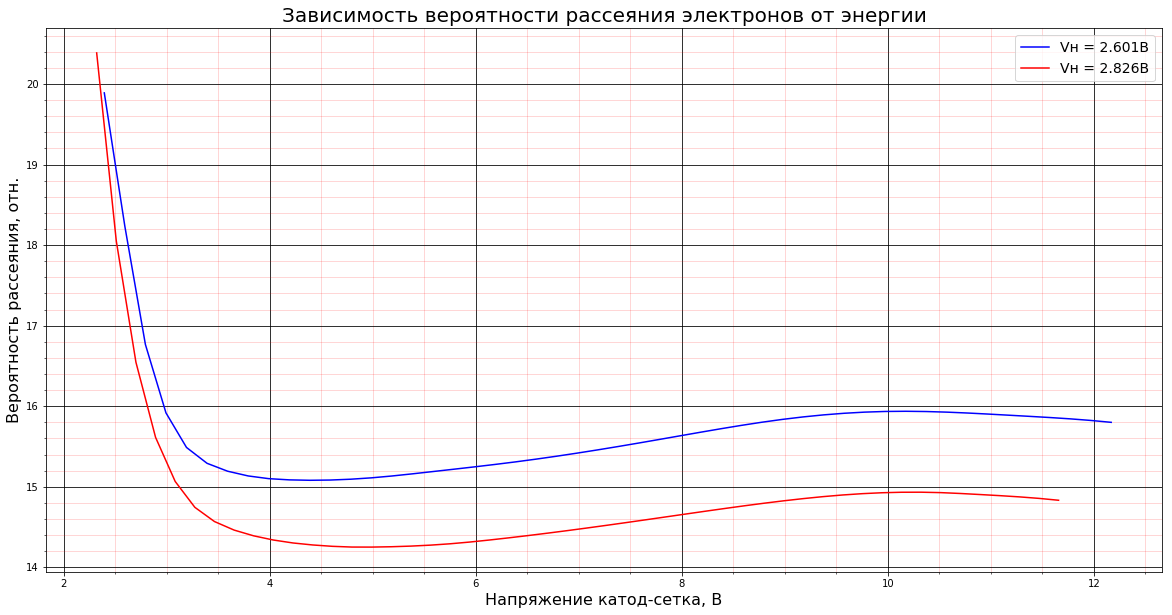

In [50]:

pts1 = np.linspace(np.min(Vkc[V1]), np.max(Vkc[V1]))
pts2 = np.linspace(np.min(Vkc[V2]), np.max(Vkc[V2]))
w1 = -1*np.log(f1(pts1))
w2 = -1*np.log(f2(pts2))


plt.figure(figsize=(20,10))
first, = plt.plot(pts1, w1, '-b', label=u'Vн = {}В'.format(V1))
second, = plt.plot(pts2, w2, '-r', label=u'Vн = {}В'.format(V2))
plt.legend(handles = [first, second], fontsize=14)
plt.title(u"Зависимость вероятности рассеяния электронов от энергии", fontsize=20)
plt.xlabel(u"Напряжение катод-сетка, В", fontsize=16)
plt.ylabel(u"Вероятность рассеяния, отн.", fontsize=16)
plt.grid(b=True, which='major', color='k', linestyle='-')
plt.grid(b=True, which='minor', color='r', linestyle='-', alpha=0.2)
plt.minorticks_on()

plt.savefig('graph1.png')
plt.show()